In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg = LinearRegression()


In [2]:
stats = pd.read_csv('prepared_plyrs_stats.csv', index_col=0)

stats.head()

,salary,season,Salary Cap,% of Salary Cap,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PTS
0,395000.0,1990-91,11871000.0,0.033274,0.3,50.2,0.0,70.1,256,5.7
1,494000.0,1991-92,12500000.0,0.039520,0.3,50.2,0.0,70.1,256,5.7
2,500000.0,1992-93,14000000.0,0.035714,0.3,50.2,0.0,70.1,256,5.7
3,805000.0,1993-94,15175000.0,0.053048,0.3,50.2,0.0,70.1,256,5.7
4,650000.0,1994-95,15964000.0,0.040717,0.3,50.2,0.0,70.1,256,5.7


<function matplotlib.pyplot.show(close=None, block=None)>

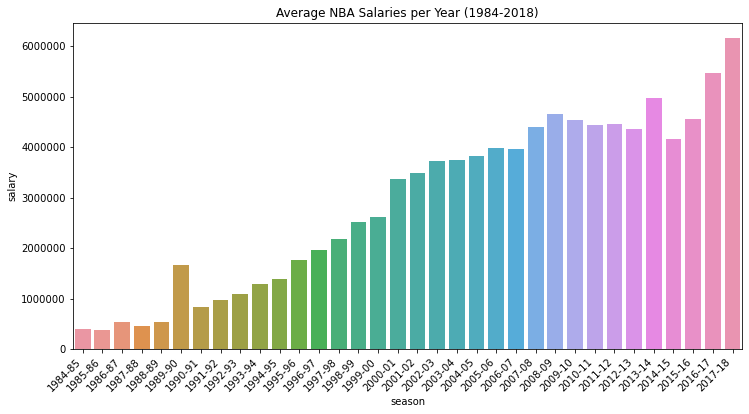

In [16]:
plt.figure(figsize=(12,6))
stats_chart = stats.groupby('season', as_index=False)['salary'].mean()
chart = sns.barplot(data=stats_chart, x='season', y='salary')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average NBA Salaries per Year (1984-2018)')
plt.show

In [45]:
#stats = stats.drop(['Salary Cap'], axis = 1)
stats = stats.drop(['salary'], axis = 1)
stats.describe()


,% of Salary Cap,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PTS
count,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000
mean,0.079084,2.086966,45.239960,26.507383,73.797696,615.134229,9.360238
std,0.082294,1.718539,5.049756,12.985517,9.455846,344.978096,5.062386
min,0.000047,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.020593,0.800000,42.200000,19.100000,69.200000,341.000000,5.500000
50%,0.051685,1.600000,45.000000,31.400000,75.300000,618.000000,8.400000
75%,0.110269,2.800000,48.400000,35.600000,80.200000,858.000000,12.500000
max,1.237122,11.200000,67.000000,100.000000,100.000000,1611.000000,30.100000


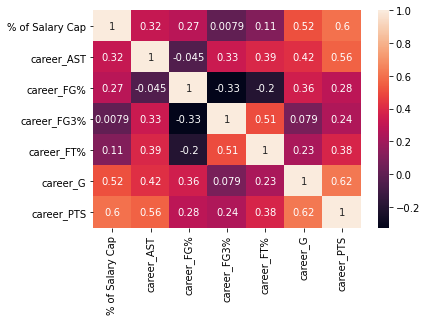

In [46]:
heatmap = sns.heatmap(stats.corr(), annot=True)

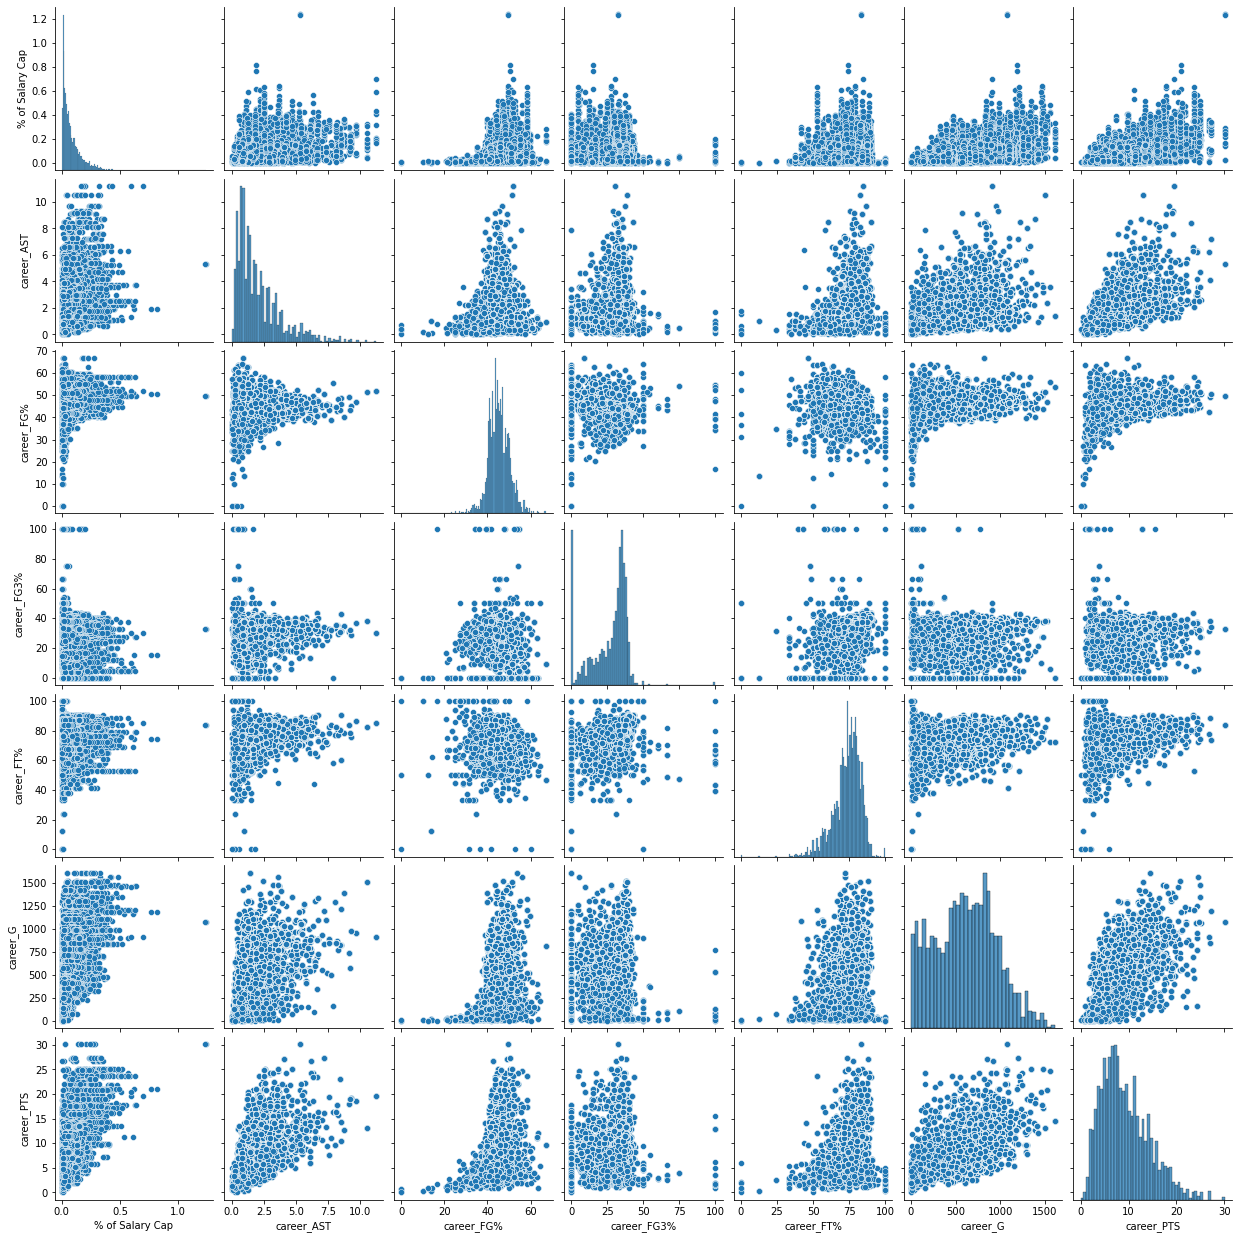

In [47]:
sns.pairplot(stats)

In [22]:
stats = stats.drop(['season'], axis = 1)

In [48]:
y = stats['% of Salary Cap']
X = stats.drop(['% of Salary Cap'], axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=2)

In [50]:
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = reg.predict(X_test)

compare = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
2204,0.134666,0.143685
6147,0.021387,0.088952
13893,0.003969,0.030620
7517,0.280298,0.137716
514,0.013011,0.073201
...,...,...
13755,0.040000,0.072524
9998,0.084554,0.138656
7973,0.148962,0.148532
1559,0.050698,0.085900


In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.04422569210199696
MSE: 0.003936022174388668
RMSE: 0.0627377252886066


# OLS Regression

In [53]:
import statsmodels.api as sm


In [54]:
x1 = sm.add_constant(X)

In [55]:
result = sm.OLS(y, x1).fit()

In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        % of Salary Cap   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1645.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:08:04   Log-Likelihood:                 18410.
No. Observations:               13626   AIC:                        -3.681e+04
Df Residuals:                   13619   BIC:                        -3.675e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0451      0.008      5.623      